## YCoCg color transform

In [1]:
from IPython.display import Image, display

In [2]:
#!pip install -r ../requirements.txt

  Cloning https://github.com/vicente-gonzalez-ruiz/information_theory (to revision main) to /tmp/pip-install-34j9gkab/information-theory_7ba4ef941b7c41298eb20b6222bfee98
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/information_theory /tmp/pip-install-34j9gkab/information-theory_7ba4ef941b7c41298eb20b6222bfee98
  Resolved https://github.com/vicente-gonzalez-ruiz/information_theory to commit d8772a598155c4ad6a3947dff5f2079c4fdc8728
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/vicente-gonzalez-ruiz/DCT2D (to revision master) to /tmp/pip-install-34j9gkab/dct2d_54566e0dceee495db6db45f4ae2b1cfd
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/DCT2D /tmp/pip-install-34j9gkab/dct2d_54566e0dceee495db6db45f4ae2b1cfd
  Resolved https://github.com/vicente-gonzalez-ruiz/DCT2D to commit

### Help

In [3]:
!python ../src/YCoCg.py -h

usage: YCoCg.py [-h] [-g] {encode,decode} ...

Exploiting color (perceptual) redundancy with the YCoCg transform.

positional arguments:
  {encode,decode}  You must specify one of the following subcomands:
    encode         Encode an image
    decode         Decode an image

options:
  -h, --help       show this help message and exit
  -g, --debug      Output debug information (default: False)


In [4]:
!python ../src/YCoCg.py encode -h

usage: YCoCg.py encode [-h] [-c QUANTIZER]

options:
  -h, --help            show this help message and exit
  -c QUANTIZER, --quantizer QUANTIZER
                        Quantizer (default: deadzone)


### Encoding

In [5]:
!wget http://www.hpca.ual.es/~vruiz/images/pajarillo_512x512.png -O /tmp/pajarillo.png

--2025-03-07 17:14:15--  http://www.hpca.ual.es/~vruiz/images/pajarillo_512x512.png
Resolving www.hpca.ual.es (www.hpca.ual.es)... 150.214.150.42
Connecting to www.hpca.ual.es (www.hpca.ual.es)|150.214.150.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237034 (231K) [image/png]
Saving to: ‘/tmp/pajarillo.png’

/tmp/pajarillo.png  100%[===================>] 231.48K   378KB/s    in 0.6s    

2025-03-07 17:14:16 (378 KB/s) - ‘/tmp/pajarillo.png’ saved [237034/237034]



In [18]:
!python ../src/YCoCg.py encode -i /tmp/pajarillo.png -q 4

main Namespace(debug=False, subparser_name='encode', quantizer='deadzone', entropy_image_codec='PNG', input='/tmp/pajarillo.png', output='/tmp/encoded', QSS=4, func=<function encode at 0x7fedbc112de0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Written 215071 bytes in /tmp/original.png with shape (512, 512, 3) and type uint8
(INFO) entropy_image_coding: Written 51699 bytes in /tmp/encoded.png
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 51699 bytes written
(INFO) entropy_image_coding: rate = 1.577728271484375 bits/pixel


### Decoding

In [19]:
!python ../src/YCoCg.py decode -q 4

main Namespace(debug=False, subparser_name='decode', quantizer='deadzone', entropy_image_codec='PNG', filter='none', filter_size=3, input='/tmp/encoded', output='/tmp/decoded.png', QSS=4, func=<function decode at 0x7fb9fb5d6200>)
(INFO) main: input = /tmp/encoded
(INFO) main: output = /tmp/decoded.png
(INFO) entropy_image_coding: Read 51699 bytes from /tmp/encoded.png
(INFO) blur: Using filter none with size 3
(WARNING) YCoCg: y[(np.int64(151), np.int64(303), np.int64(2))]=272
(WARNING) YCoCg: y[(np.int64(147), np.int64(299), np.int64(1))]=-16
(INFO) entropy_image_coding: Written 59393 bytes in /tmp/decoded.png with shape (512, 512, 3) and type uint8
(INFO) entropy_image_coding: Total 51699 bytes read
(INFO) entropy_image_coding: Total 59394 bytes written
(INFO) entropy_image_coding: Read 215071 bytes from file:///tmp/original.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Read 59393 bytes from /tmp/decoded.png with shape (512, 512, 3) and type=uint8
(INFO) en

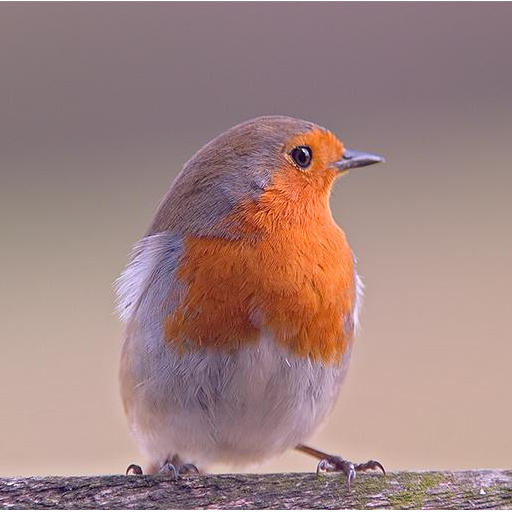

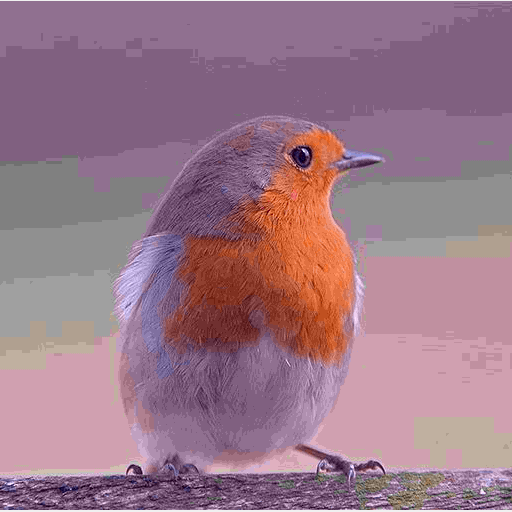

In [20]:
display(Image(filename="/tmp/pajarillo.png"))
display(Image(filename="/tmp/decoded.png"))

### Comparing with YCrCb

main Namespace(debug=False, subparser_name='encode', quantizer='deadzone', entropy_image_codec='PNG', input='/tmp/pajarillo.png', output='/tmp/encoded', QSS=4, func=<function encode at 0x7fb0b2116de0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Written 215071 bytes in /tmp/original.png with shape (512, 512, 3) and type uint8
-----------------> uint8
(INFO) entropy_image_coding: Written 52371 bytes in /tmp/encoded.png
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 52371 bytes written
(INFO) entropy_image_coding: rate = 1.598236083984375 bits/pixel
main Namespace(debug=False, subparser_name='decode', quantizer='deadzone', entropy_image_codec='PNG', filter='none', filter_size=3, input='/tmp/encoded', output='/tmp/YCrCb.png', QSS=4, func=<function decode at 0x7fe9c8fce200>)
(INFO)

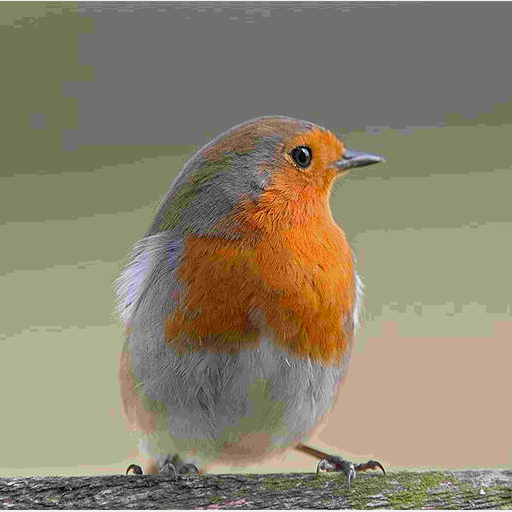

In [21]:
!python ../src/YCrCb.py encode -i /tmp/pajarillo.png -q 4
!python ../src/YCrCb.py decode -o /tmp/YCrCb.png -q 4
display(Image(filename="/tmp/YCrCb.png"))

### Using (2D) VQ

main Namespace(debug=False, subparser_name='encode', quantizer='VQ', entropy_image_codec='PNG', input='/tmp/pajarillo.png', output='/tmp/encoded', block_size_VQ=4, N_clusters=256, func=<function encode at 0x7ff03d716de0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Written 215071 bytes in /tmp/original.png with shape (512, 512, 3) and type uint8
(INFO) entropy_image_coding: Written 6172 bytes in /tmp/encoded.png
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 47343 bytes written
(INFO) entropy_image_coding: rate = 1.444793701171875 bits/pixel
main Namespace(debug=False, subparser_name='decode', quantizer='VQ', entropy_image_codec='PNG', filter='none', filter_size=3, input='/tmp/encoded', output='/tmp/decoded.png', block_size_VQ=4, N_clusters=256, func=<function decode at 0x7fe98

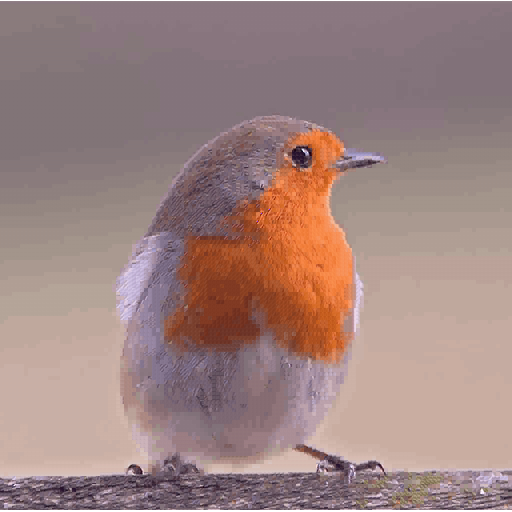

In [22]:
!python ../src/YCoCg.py encode -i /tmp/pajarillo.png -c VQ
!python ../src/YCoCg.py decode -c VQ
display(Image(filename="/tmp/decoded.png"))

### Using a blur filter

main Namespace(debug=False, subparser_name='encode', quantizer='VQ', entropy_image_codec='PNG', input='/tmp/pajarillo.png', output='/tmp/encoded', block_size_VQ=8, N_clusters=32, func=<function encode at 0x7f1d9791ade0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Written 215071 bytes in /tmp/original.png with shape (512, 512, 3) and type uint8
(INFO) entropy_image_coding: Written 1019 bytes in /tmp/encoded.png
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 22434 bytes written
(INFO) entropy_image_coding: rate = 0.68463134765625 bits/pixel
main Namespace(debug=False, subparser_name='decode', quantizer='VQ', entropy_image_codec='PNG', filter='gaussian', filter_size=11, input='/tmp/encoded', output='/tmp/decoded.png', block_size_VQ=8, N_clusters=32, func=<function decode at 0x7fa

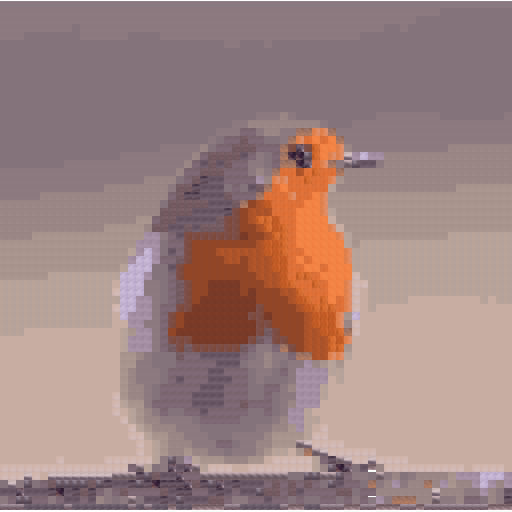

In [23]:
!python ../src/YCoCg.py encode -i /tmp/pajarillo.png -c VQ  -n 32 -b 8
!python ../src/YCoCg.py decode -c VQ -n 32 -b 8 -f gaussian -s 11
display(Image(filename="/tmp/decoded.png"))

main Namespace(debug=False, subparser_name='encode', quantizer='deadzone', entropy_image_codec='PNG', input='/tmp/pajarillo.png', output='/tmp/encoded', QSS=8, func=<function encode at 0x7fbfd551ade0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Written 26914 bytes in /tmp/encoded.png
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 26915 bytes written
(INFO) entropy_image_coding: rate = 0.821380615234375 bits/pixel
main Namespace(debug=False, subparser_name='decode', quantizer='deadzone', entropy_image_codec='PNG', filter='none', filter_size=3, input='/tmp/encoded', output='/tmp/decoded.png', QSS=8, func=<function decode at 0x7f7d663d2200>)
(INFO) main: input = /tmp/encoded
(INFO) main: output = /tmp/decoded.png
(INFO) entropy_image_coding: Read 26914 bytes from /tmp/encoded.png

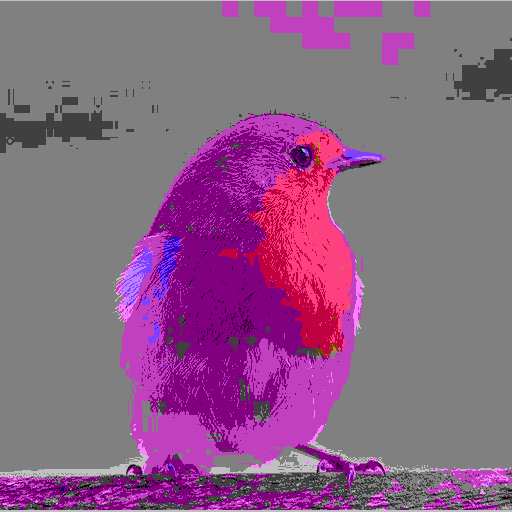

In [28]:
!python ../src/YCoCg.py encode -i /tmp/pajarillo.png -q 8
!python ../src/YCoCg.py decode -q 8
display(Image(filename="/tmp/decoded.png"))

main Namespace(debug=False, subparser_name='encode', quantizer='deadzone', entropy_image_codec='PNG', input='/tmp/pajarillo.png', output='/tmp/encoded', QSS=8, func=<function encode at 0x7fbe3451ade0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Written 26914 bytes in /tmp/encoded.png
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 26915 bytes written
(INFO) entropy_image_coding: rate = 0.821380615234375 bits/pixel
main Namespace(debug=False, subparser_name='decode', quantizer='deadzone', entropy_image_codec='PNG', filter='gaussian', filter_size=11, input='/tmp/encoded', output='/tmp/decoded.png', QSS=8, func=<function decode at 0x7fed8b9d6200>)
(INFO) main: input = /tmp/encoded
(INFO) main: output = /tmp/decoded.png
(INFO) entropy_image_coding: Read 26914 bytes from /tmp/encode

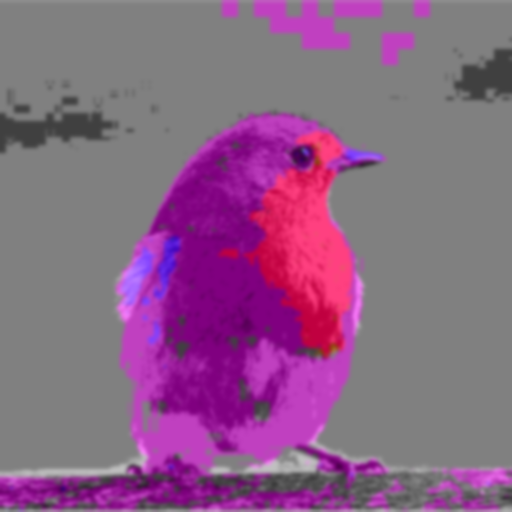

In [29]:
!python ../src/YCoCg.py encode -i /tmp/pajarillo.png -q 8
!python ../src/YCoCg.py decode -q 8 -f gaussian -s 11
display(Image(filename="/tmp/decoded.png"))